#### Question : With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.


In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('filtered_dataset.csv')

In [3]:
df.head()

,audience_rating,writers_encoded,directors_encoded,tomatometer_rating,studio_name_encoded,tomatometer_status_encoded
0,53.0,53.000000,64.153846,49,60.562802,2
1,64.0,54.833333,59.400000,86,71.982580,0
2,53.0,57.833333,61.703704,68,53.000000,1
3,97.0,92.000000,65.793103,100,84.045455,0
4,74.0,74.000000,60.687500,89,57.615385,1


In [4]:
df.columns

Index(['audience_rating', 'writers_encoded', 'directors_encoded',
       'tomatometer_rating', 'studio_name_encoded',
       'tomatometer_status_encoded'],
      dtype='object')

In [5]:
df.isnull().sum()

audience_rating                0
writers_encoded                0
directors_encoded             50
tomatometer_rating             0
studio_name_encoded            0
tomatometer_status_encoded     0
dtype: int64

In [6]:
df=df.dropna().reset_index(drop=True)

In [7]:
df.isnull().sum()

audience_rating               0
writers_encoded               0
directors_encoded             0
tomatometer_rating            0
studio_name_encoded           0
tomatometer_status_encoded    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15263 entries, 0 to 15262
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   audience_rating             15263 non-null  float64
 1   writers_encoded             15263 non-null  float64
 2   directors_encoded           15263 non-null  float64
 3   tomatometer_rating          15263 non-null  int64  
 4   studio_name_encoded         15263 non-null  float64
 5   tomatometer_status_encoded  15263 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 715.6 KB


In [9]:
df[['audience_rating', 'writers_encoded', 'directors_encoded','tomatometer_rating', 'studio_name_encoded','tomatometer_status_encoded']]=df[['audience_rating', 'writers_encoded', 'directors_encoded','tomatometer_rating', 'studio_name_encoded','tomatometer_status_encoded']].astype(int)

In [10]:
df.head()

,audience_rating,writers_encoded,directors_encoded,tomatometer_rating,studio_name_encoded,tomatometer_status_encoded
0,53,53,64,49,60,2
1,64,54,59,86,71,0
2,53,57,61,68,53,1
3,97,92,65,100,84,0
4,74,74,60,89,57,1


In [11]:
df.describe()

,audience_rating,writers_encoded,directors_encoded,tomatometer_rating,studio_name_encoded,tomatometer_status_encoded
count,15263.000000,15263.000000,15263.000000,15263.000000,15263.000000,15263.000000
mean,60.558737,60.418856,60.313831,59.780580,60.170150,1.257223
std,20.321720,18.284014,16.235015,28.573872,10.896425,0.753020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,48.000000,50.000000,37.000000,55.000000,1.000000
50%,62.000000,63.000000,62.000000,65.000000,60.000000,1.000000
75%,77.000000,74.000000,72.000000,85.000000,65.000000,2.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000


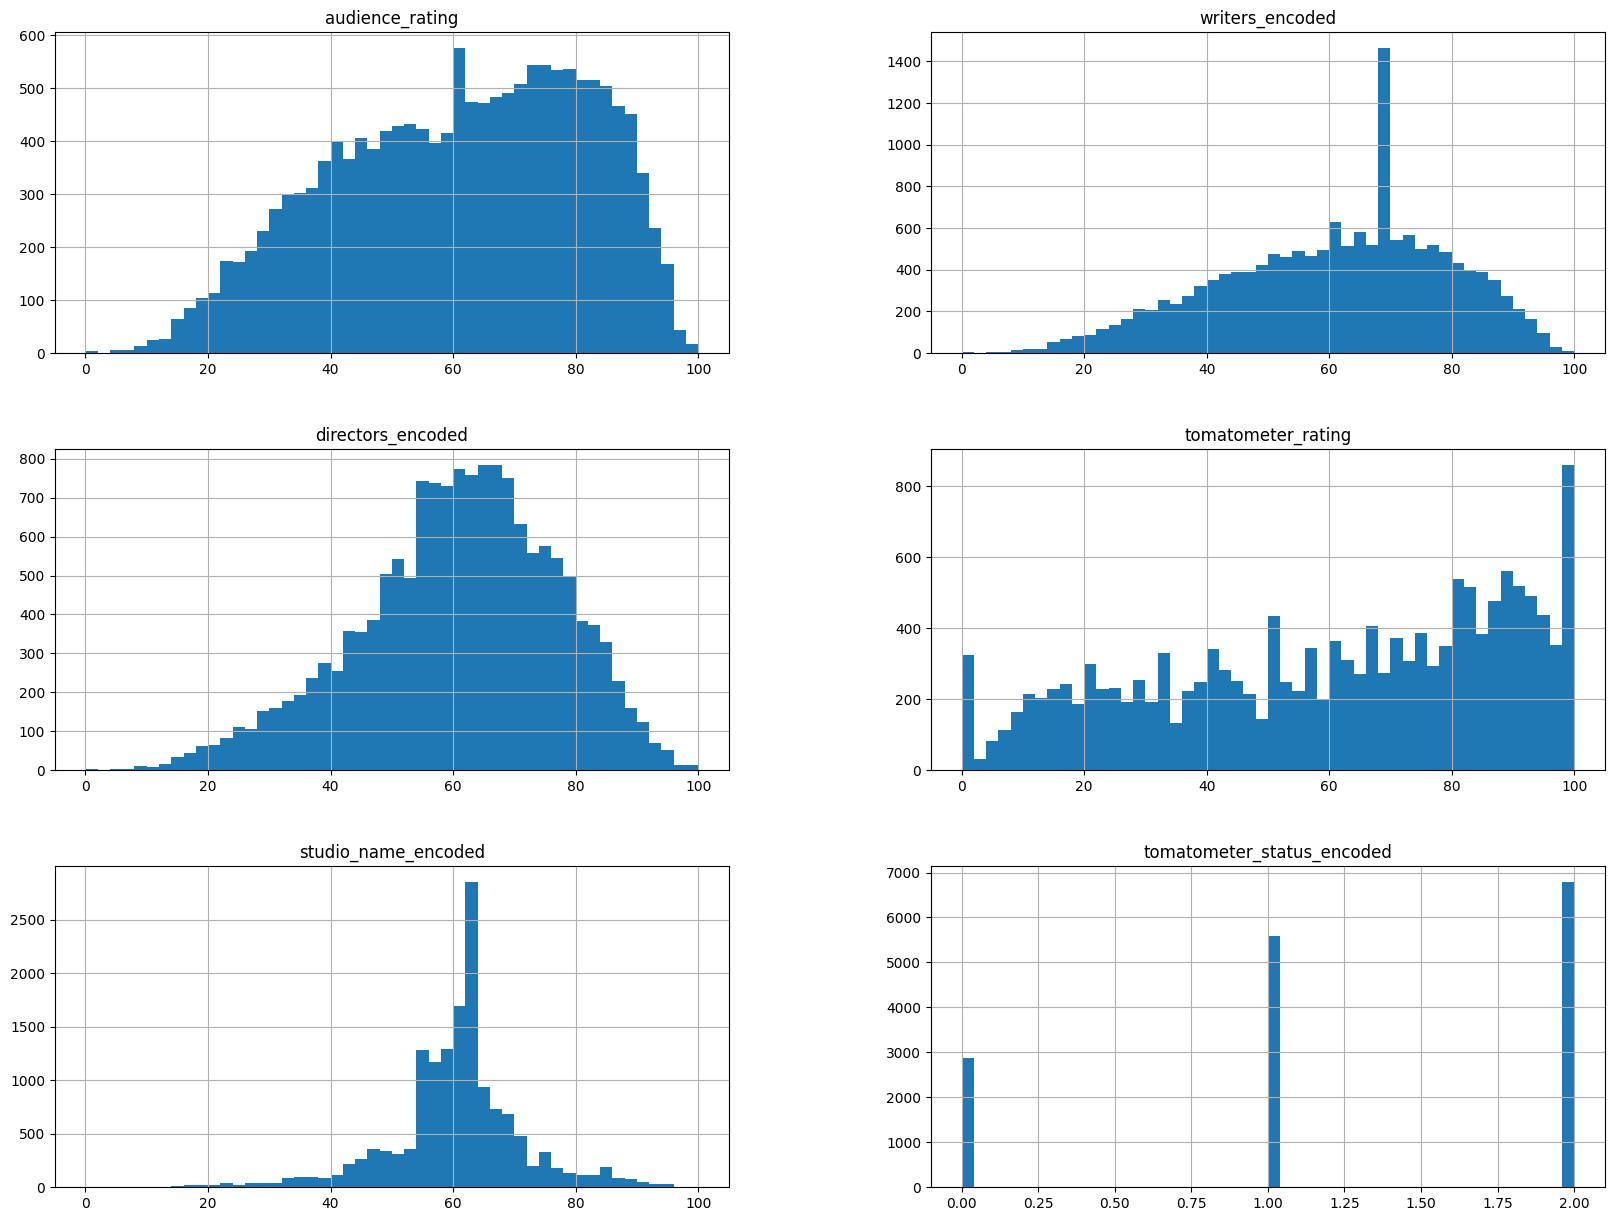

In [12]:
## Plot density plot for all features
df.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

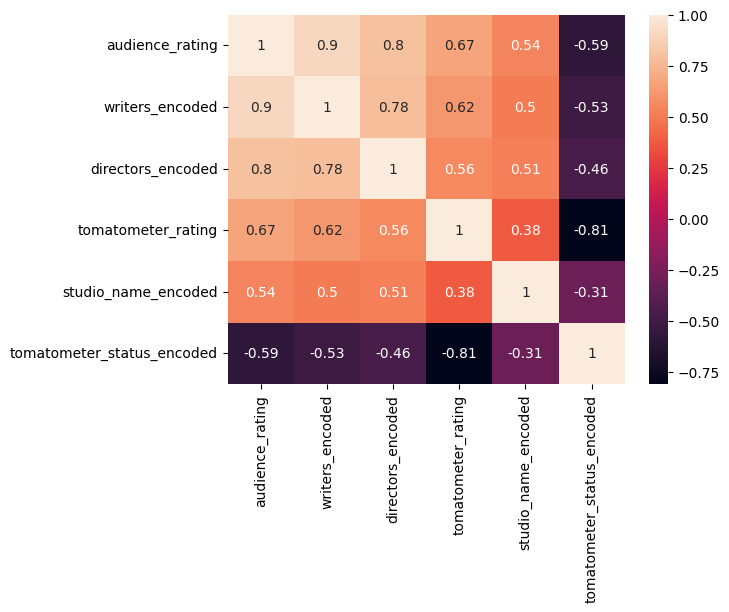

In [13]:
sns.heatmap(df.corr(),annot=True)

### SPLITTING THE DATASET INTO X and y:
#### X ---> All the features necessary for calculations
#### Y ---> Target feature 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['writers_encoded', 'directors_encoded', 'tomatometer_rating', 'studio_name_encoded', 'tomatometer_status_encoded']]  # Features
y = df['audience_rating']  # Target variable

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape,X_test.shape

((11447, 5), (3816, 5))

In [18]:
## Feature Selection based on correlaltion
X_train.corr()

,writers_encoded,directors_encoded,tomatometer_rating,studio_name_encoded,tomatometer_status_encoded
writers_encoded,1.000000,0.783223,0.617866,0.505480,-0.529965
directors_encoded,0.783223,1.000000,0.556553,0.513899,-0.462880
tomatometer_rating,0.617866,0.556553,1.000000,0.378584,-0.811577
studio_name_encoded,0.505480,0.513899,0.378584,1.000000,-0.314161
tomatometer_status_encoded,-0.529965,-0.462880,-0.811577,-0.314161,1.000000


### THE BELOW GRAPH SHOWS THE RELATION AND CORRELATION BETWEEN THE FEATURES AMONGST EACH OTHER

<Axes: >

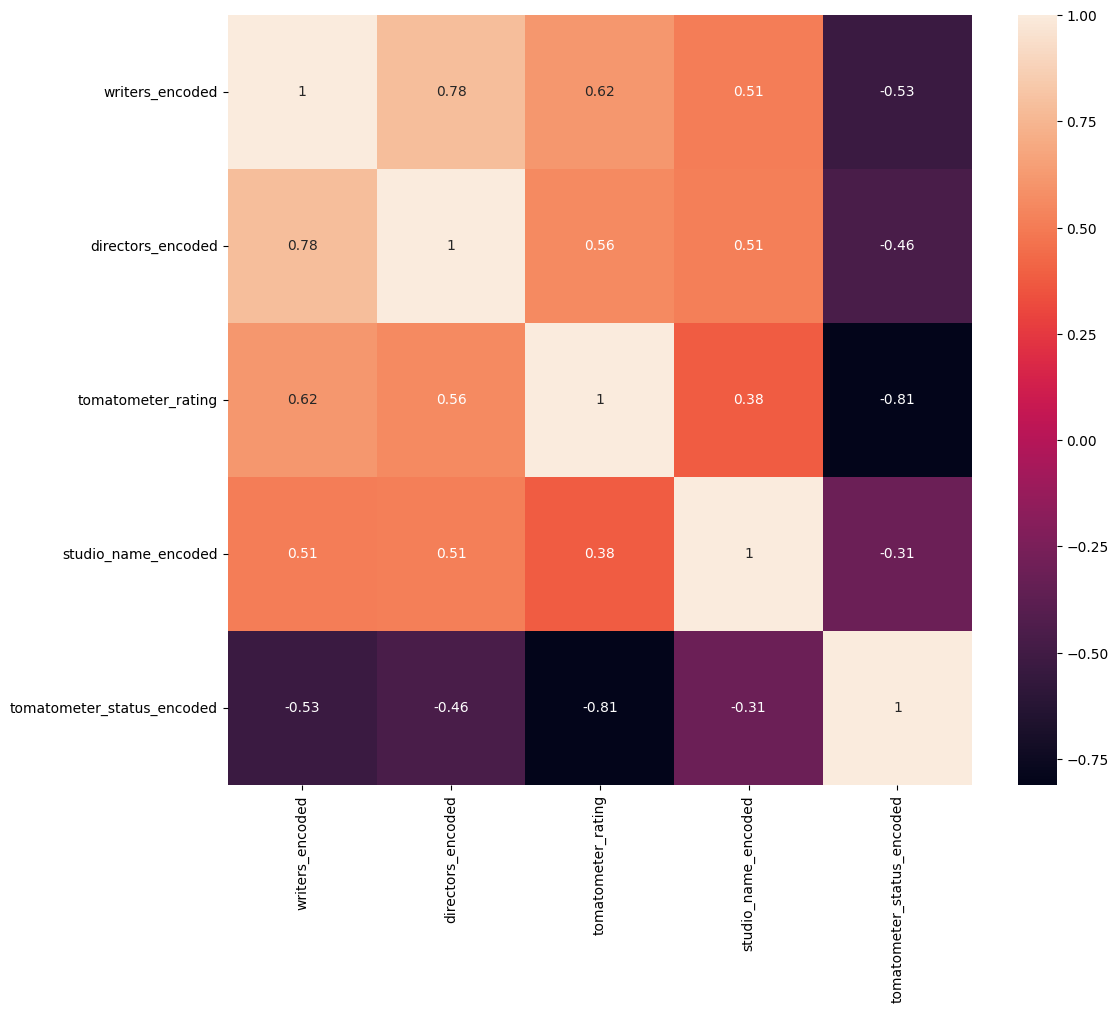

In [19]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [20]:
# Standardize the dataset - Train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train.head()

,writers_encoded,directors_encoded,tomatometer_rating,studio_name_encoded,tomatometer_status_encoded
10017,73,70,90,60,0
12511,85,56,61,60,1
2899,63,79,85,64,0
5459,59,62,56,56,2
7363,57,70,39,53,2


In [22]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## LINEAR REGRESSION

In [23]:
## Train the model using SLR
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [24]:
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
regressor.predict(X_train)

array([76.19159334, 77.07580547, 71.59351789, ..., 71.35767566,
       50.42540428, 33.78831149])

In [26]:
y_pred_test=regressor.predict(X_test)
y_pred_test

array([25.64496765, 52.71709627, 80.26858659, ..., 45.45606325,
       73.31043529, 27.91624547])

## RANDOM FOREST REGRESSOR

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [47]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred

array([18.    , 50.63  , 77.31  , ..., 46.0175, 78.89  , 26.39  ])

In [48]:
# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2*100}")


Root Mean Squared Error (RMSE): 7.213688738440516
R² Score: 87.42009664126218


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### HYPERPARAMETER TUNING FOR RANDOM FOREST REGRESSION ALGORITHM USING RANDOMIZEDSEARCHCV

In [39]:
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error'],  # Valid values for RandomForestRegressor
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
cv = RandomizedSearchCV(
    rf_model,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=3,
    n_iter=50,
    random_state=42
)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-45.897 total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-49.636 total time=   1.5s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-49.930 total time=   1.6s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-48.273 total time=   1.3s
[CV 5/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-43.004 total time=   0.9s
[CV 1/5] END criterion=absolute_error, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-50.151 total time=  24.6s
[CV 2/5] END criterion=absolute_error, max_depth=None, min_samples

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [42]:
# Best parameters and score
best_params = cv.best_params_
best_score = cv.best_score_
print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'squared_error'}
Best Negative MSE Score: -47.30150118562304


In [44]:
# Retrain the Random Forest Regressor with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=10,
    criterion='squared_error',
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the retrained model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Retrained Random Forest MSE:", mse_best_rf)
print("Retrained Random Forest R²:", r2_best_rf*100)

Retrained Random Forest MSE: 48.576337119513006
Retrained Random Forest R²: 88.25677801802124


## DECISION TREE REGRESSOR


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2*100)

Mean Squared Error (MSE): 91.2541928721174
R² Score: 77.93950085106123


## SUPPORT VECTOR REGRESSOR

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [55]:
# Step 1: Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.2))
])

# Step 2: Train the model
pipeline.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = pipeline.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2*100)


Mean Squared Error (MSE): 60.22467697934384
R-squared (R²): 85.44081763881476


## XG Boost Algorithm

In [56]:
from xgboost import XGBRegressor

In [57]:
# Step 1: Create a pipeline with preprocessing and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6))
])

# Step 2: Train the model
pipeline.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = pipeline.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2*100)


Mean Squared Error (MSE): 47.943540737470066
R-squared (R²): 88.40975514277727


In [62]:
from sklearn.model_selection import RandomizedSearchCV


#### HYPERPARAMETER TUNING USING RANDOMIZEDSEARCHCV

In [63]:
# Step 1: Set up hyperparameter tuning parameters for RandomizedSearchCV
param_distributions = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__learning_rate': np.linspace(0.01, 0.3, 10),
    'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9],
    'xgb__subsample': np.linspace(0.6, 1.0, 5),
    'xgb__colsample_bytree': np.linspace(0.6, 1.0, 5),
    'xgb__reg_alpha': [0, 0.1, 0.5, 1.0],
    'xgb__reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Step 2: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, scoring='r2', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importance_ty...
                                        'xgb__learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'xgb__n_estimators': [50, 100, 200,
                                                              300],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'xgb__reg_lambda': [0.5, 1.0, 1.5, 2.0],
                                        'xgb__subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='r2', verbose=1)

In [65]:
# Step 1: Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Step 2: Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Print results
print("Best Parameters:", best_params)
print("Best Cross-Validated R²:", best_score)
print("Test Set Mean Squared Error (MSE):", mse)
print("Test Set R-squared (R²):", r2*100)

Best Parameters: {'xgb__subsample': 0.7, 'xgb__reg_lambda': 2.0, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 200, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.042222222222222223, 'xgb__colsample_bytree': 1.0}
Best Cross-Validated R²: 0.8864225846071733
Test Set Mean Squared Error (MSE): 47.54377248430713
Test Set R-squared (R²): 88.50639823315048
